In [32]:
path = r'D:\Project\UEL_Attacker\FraudGraphML\ML Model\Dataset\processed_data.csv'

In [33]:
import pandas as pd
df = pd.read_csv(path)

In [34]:
df.columns = df.columns.str.strip() 

In [35]:
df['FLAG'] = 1 - df['FLAG']

In [36]:
from sklearn.model_selection import train_test_split

target = 'FLAG'

X = df.drop(columns=[target])
y = df[target]

In [37]:
X

Index  Avg min between sent tnx  Avg min between received tnx  \
0         1                    844.26                       1093.71   
1         2                  12709.07                       2958.44   
2         3                 246194.54                       2434.02   
3         4                  10219.60                      15785.09   
4         5                     36.61                      10707.77   
...     ...                       ...                           ...   
9836   2175                  12635.10                        631.39   
9837   2176                      0.00                          0.00   
9838   2177                   2499.44                       2189.29   
9839   2178                      0.00                          0.00   
9840   2179                  37242.70                        149.56   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                   704785.63       721            89   
1                                  1218216.73        94             8   
2                                   516729.30         2            10   
3                                   397555.90        25             9   
4                                   382472.42      4598            20   
...                                       ...       ...           ...   
9836                                 58748.48         4            13   
9837                                     0.00         0             0   
9838                                261601.88        67            43   
9839                                     0.00         0             1   
9840                                670817.33        18             3   

      Number of Created Contracts  Unique Received From Addresses  \
0                               0                              40   
1                               0                               5   
2                               0                              10   
3                               0                               7   
4                               1                               7   
...                           ...                             ...   
9836                            0                              11   
9837                            0                               0   
9838                            0                              31   
9839                            0                               1   
9840                            0                               1   

      Unique Sent To Addresses  min value received  ...  ERC20 min val sent  \
0                          118            0.000000  ...            0.000000   
1                           14            0.000000  ...            2.260809   
2                            2            0.113119  ...            0.000000   
3                           13            0.000000  ...          100.000000   
4                           19            0.000000  ...            0.000000   
...                        ...                 ...  ...                 ...   
9836                         4            0.004082  ...            0.000000   
9837                         0            0.000000  ...            0.000000   
9838                        44            0.001078  ...            0.000000   
9839                         0            0.500000  ...        11741.257297   
9840                         5            0.795233  ...            0.000000   

      ERC20 max val sent  ERC20 avg val sent  ERC20 min val sent contract  \
0           1.683100e+07        2.717799e+05                          0.0   
1           2.260809e+00        2.260809e+00                          0.0   
2           0.000000e+00        0.000000e+00                          0.0   
3           9.029231e+03        3.804077e+03                          0.0   
4           4.500000e+04        1.372666e+04                          0.0   
...                  ...            

In [38]:
y

0       1
1       1
2       1
3       1
4       1
       ..
9836    0
9837    0
9838    0
9839    0
9840    0
Name: FLAG, Length: 9841, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict & evaluate
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import f1_score, classification_report

print('Classification Report below: \n\n')
print(classification_report(y_test, y_pred))

Classification Report below: 


              precision    recall  f1-score   support

           0       1.00      0.95      0.98       650
           1       0.99      1.00      0.99      2303

    accuracy                           0.99      2953
   macro avg       0.99      0.98      0.98      2953
weighted avg       0.99      0.99      0.99      2953



In [43]:
importances = model.feature_importances_
features = X_train.columns
sorted(zip(importances, features), reverse=True)

[(np.float64(0.23804927898630737), 'ERC20 most sent token type_label'),
 (np.float64(0.11313659489963293), 'ERC20 min val rec'),
 (np.float64(0.04999883856667243), 'ERC20 max val rec'),
 (np.float64(0.044654863064639665), 'ERC20 total Ether sent contract'),
 (np.float64(0.04365848281781152), 'ERC20 avg val sent'),
 (np.float64(0.04342108673359414), 'ERC20_most_rec_token_type_label'),
 (np.float64(0.03790314516869898), 'Time Diff between first and last (Mins)'),
 (np.float64(0.036357680603595996), 'ERC20 uniq sent addr.1'),
 (np.float64(0.02987477380846821), 'ERC20 avg val rec'),
 (np.float64(0.02923630117054778), 'ERC20 total Ether received'),
 (np.float64(0.02705916939873194), 'ERC20 max val sent'),
 (np.float64(0.026565854653536326), 'ERC20 min val sent'),
 (np.float64(0.025978005944477255), 'ERC20 total ether sent'),
 (np.float64(0.023413155068955825),
  'total transactions (including tnx to create contract'),
 (np.float64(0.022089348767637643), 'Unique Received From Addresses'),
 (

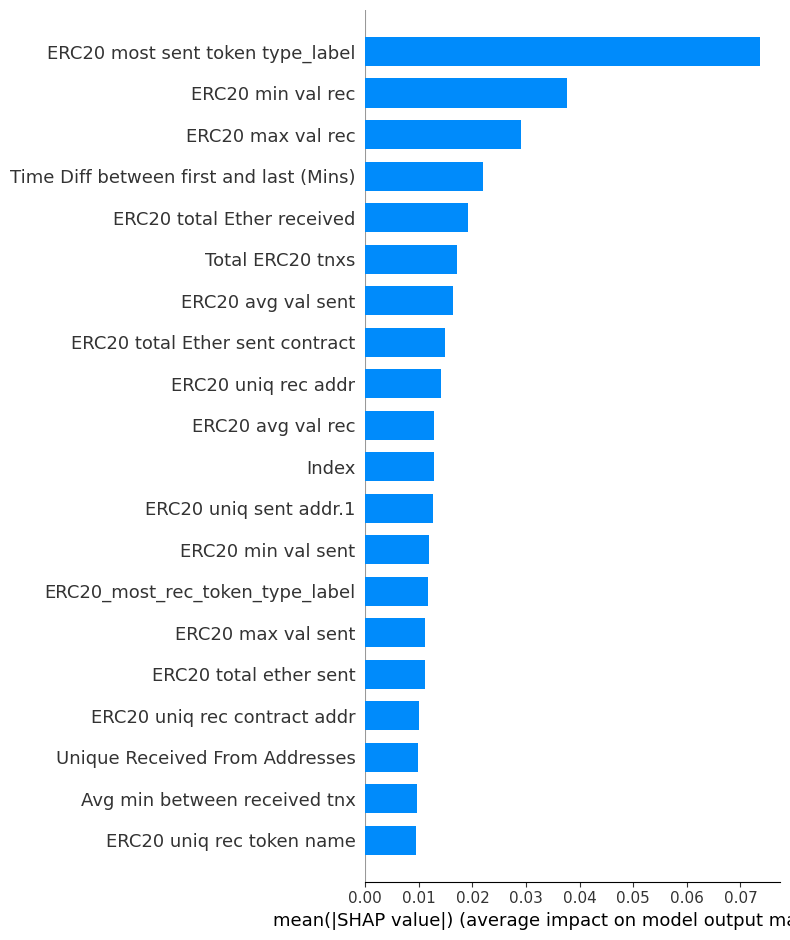

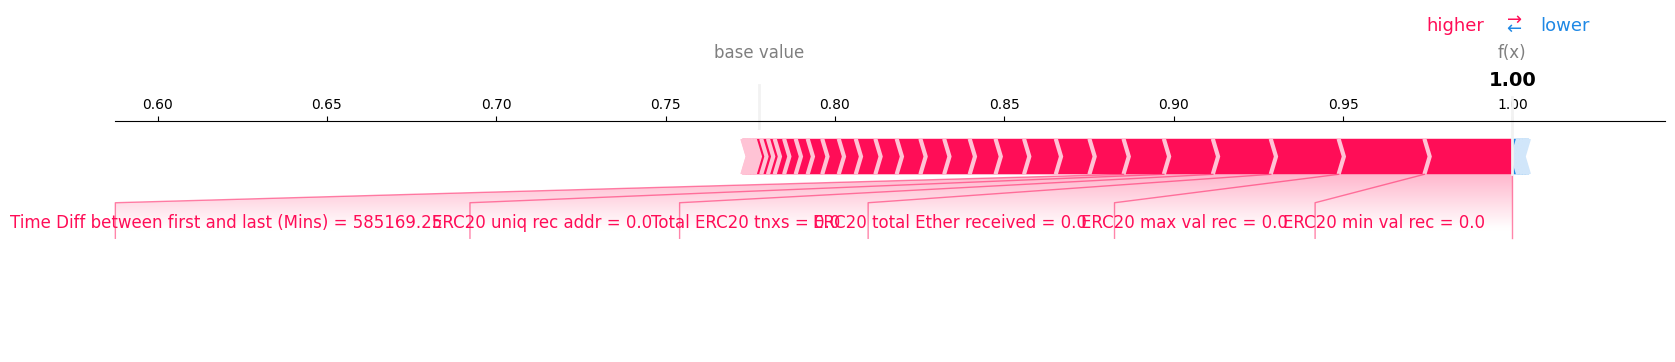

In [44]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)

shap_sample = X_train.sample(n=min(2000, len(X_train)), random_state=42)
shap_values = explainer.shap_values(shap_sample)

if isinstance(shap_values, list):
    shap_used = shap_values[1]
    expected_value = explainer.expected_value[1]
elif shap_values.ndim == 3:
    shap_used = shap_values[:, :, 1]
    expected_value = explainer.expected_value[1]
else:
    shap_used = shap_values
    expected_value = explainer.expected_value

shap.summary_plot(shap_used, shap_sample, plot_type="bar", show=True)
shap.force_plot(expected_value, shap_used[0], shap_sample.iloc[0], matplotlib=True)

In [45]:
idx = 0
from lime.lime_tabular import LimeTabularExplainer

lime_exp = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=model.classes_.astype(str),
    discretize_continuous=False,  # ⛔️ Đây là fix chính
    mode='classification'
)

row = X_test.iloc[idx]
lime_explanation = lime_exp.explain_instance(
    data_row=row.values,
    predict_fn=lambda x: model.predict_proba(pd.DataFrame(x, columns=X_train.columns)),
    num_features=10
)

lime_explanation.show_in_notebook(show_table=True, show_all=False)


In [46]:
import joblib
joblib.dump(model, r'D:\Project\UEL_Attacker\FraudGraphML\ML Model\Model\trained_model.pkl')

['D:\\Project\\UEL_Attacker\\FraudGraphML\\ML Model\\Model\\trained_model.pkl']